#Crime statistics from the city of Atlanta between 2009 and 2017
## some exploratory data analysis
## import the libraries


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np
import keras as ks

/home/windell/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# get everything into a dataframe

In [2]:
df2009 = pd.read_csv('../projects/datasets/COBRA-2009/COBRA-2009.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
df2010 = pd.read_csv('../projects/datasets/COBRA-2010/COBRA-2010.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2011 = pd.read_csv('../projects/datasets/COBRA-2011/COBRA-2011.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2012 = pd.read_csv('../projects/datasets/COBRA-2012/COBRA-2012.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2013 = pd.read_csv('../projects/datasets/COBRA-2013/COBRA-2013.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2014 = pd.read_csv('../projects/datasets/COBRA-2014/COBRA-2014.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': str, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':str, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':str, 'Neighborhood':str,'NPU':str, 'Latitude':str, 'Longitude':str})
df2015 = pd.read_csv('../projects/datasets/COBRA-2015/COBRA-2015.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
df2016 = pd.read_csv('../projects/datasets/COBRA-2016/COBRA-2016.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
df2017 = pd.read_csv('../projects/datasets/COBRA-2017/COBRA-2017.csv', error_bad_lines=False, warn_bad_lines=False, dtype={'Report Number': int, 'Report Date' : str, 'Occur Date' : str, 'Occur Time':int, 'Possible Date':str, 'Possible Time':str, 'Beat':str, 'Apartment Office Prefix':str, 'Apartment Number':str, 'Location':str, 'Shift':str, 'Shift Occurence':str, 'Location Type':str, 'UCR Literal':str, 'UCR #':float, 'Neighborhood':str,'NPU':str, 'Latitude':float, 'Longitude':float})
dataframes = [df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017]
df = pd.concat(dataframes)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304698 entries, 0 to 26405
Data columns (total 19 columns):
Report Number              304698 non-null object
Report Date                304698 non-null object
Occur Date                 304698 non-null object
Occur Time                 304698 non-null object
Possible Date              304680 non-null object
Possible Time              304679 non-null object
Beat                       304518 non-null object
Apartment Office Prefix    9279 non-null object
Apartment Number           61957 non-null object
Location                   304696 non-null object
Shift                      297519 non-null object
Shift Occurence            304698 non-null object
Location Type              298100 non-null object
UCR Literal                304698 non-null object
UCR #                      304698 non-null object
Neighborhood               293722 non-null object
NPU                        304583 non-null object
Latitude                   304698 non-null 

too many null values for 'Apartment Office Prefix' and 'Apartment Number' plus we have the location info

In [4]:
df = df.drop(['Apartment Office Prefix','Apartment Number'],axis=1)

#this line has no useful information

In [5]:
df = df.drop(df[df['Report Number']=='Report Number'].index)

#shift and shift occurence have the same information

In [6]:
df = df.drop(['Shift'],axis=1)

In [7]:
df['Latitude'] = pd.to_numeric(df['Latitude'], errors = 'coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors = 'coerce')
df['Report Number'] = pd.to_numeric(df['Report Number'], downcast='integer')
df['Occur Time'] = pd.to_numeric(df['Occur Time'], downcast='integer')
df['Possible Time'] = pd.to_numeric(df['Possible Time'], downcast='integer')
df['Beat'] = pd.to_numeric(df['Beat'], downcast='integer')
#df['Location Type'] = pd.to_numeric(df['Location Type'], downcast='integer')
df['UCR #'] = pd.to_numeric(df['UCR #'], downcast='integer')
df['Report Date'] = pd.to_datetime(df['Report Date'])
df['Occur Date'] = pd.to_datetime(df['Occur Date'])
df['Possible Date'] = pd.to_datetime(df['Possible Date'])

In [8]:
df = pd.concat([df, df['UCR Literal'].str.get_dummies()], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304689 entries, 0 to 26405
Data columns (total 27 columns):
Report Number           304689 non-null int32
Report Date             304689 non-null datetime64[ns]
Occur Date              304689 non-null datetime64[ns]
Occur Time              304689 non-null int16
Possible Date           304671 non-null datetime64[ns]
Possible Time           304670 non-null float64
Beat                    304509 non-null float64
Location                304687 non-null object
Shift Occurence         304689 non-null object
Location Type           298091 non-null object
UCR Literal             304689 non-null object
UCR #                   304689 non-null int16
Neighborhood            293713 non-null object
NPU                     304574 non-null object
Latitude                304689 non-null float64
Longitude               304689 non-null float64
AGG ASSAULT             304689 non-null int64
AUTO THEFT              304689 non-null int64
BURGLARY-NONRES      

In [10]:
df.head()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Location,Shift Occurence,Location Type,...,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
0,90010721,2009-01-01,2009-01-01,815,2009-01-01,820.0,408.0,3030 HEADLAND DR SW,Day Watch,12,...,0,0,0,0,0,1,0,0,0,0
1,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,408.0,2841 GREENBRIAR PKWY,Day Watch,8,...,0,0,0,0,0,1,0,0,0,0
2,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,506.0,12 BROAD ST SW,Day Watch,9,...,0,0,0,0,0,1,0,0,0,0
3,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,413.0,3500 MARTIN L KING JR DR SW,Unknown,8,...,0,0,0,0,0,1,0,0,0,0
4,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,204.0,3393 PEACHTREE RD NE,Evening Watch,8,...,0,0,0,0,0,1,0,0,0,0


In [11]:
df2 = df.groupby(df['Report Date'].dt.year)

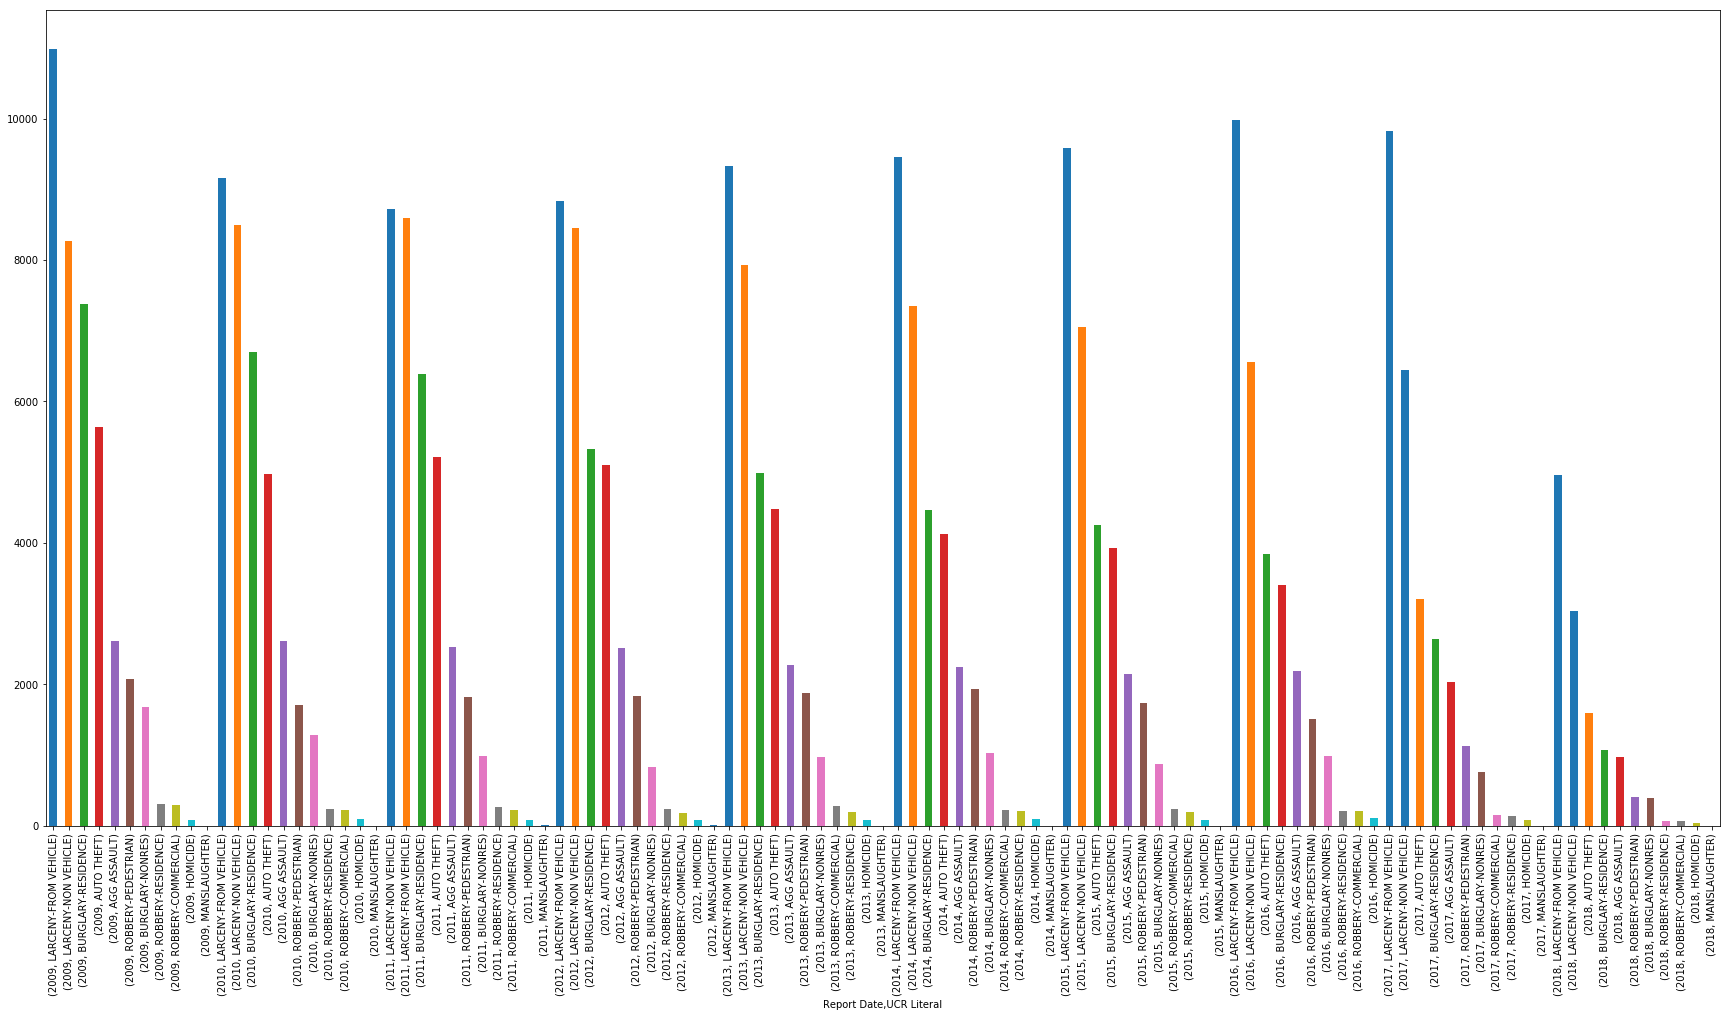

In [12]:
plt.figure(figsize=(30,15))
df2['UCR Literal'].value_counts().plot(kind='bar')

/home/windell/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/windell/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/windell/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


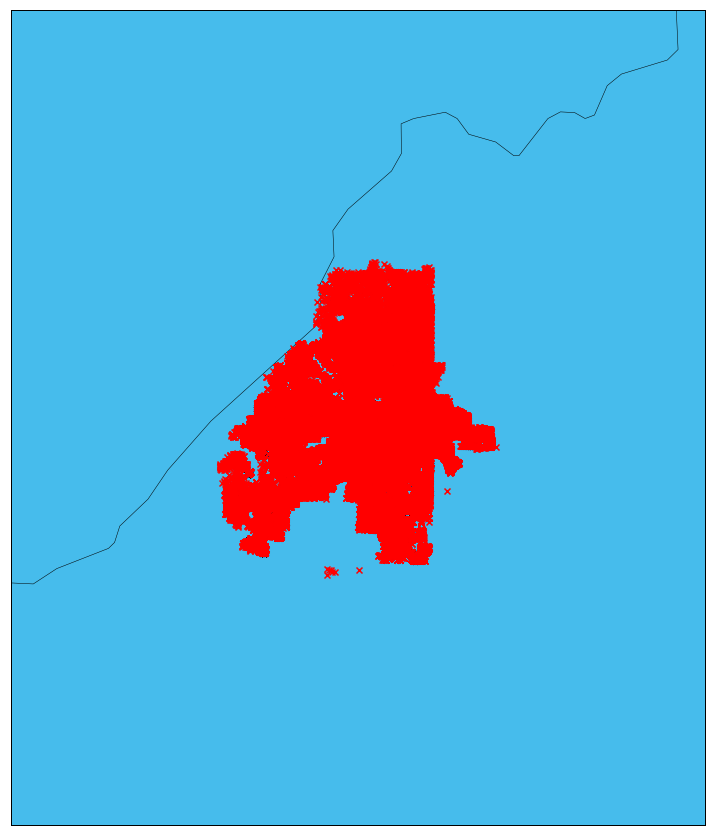

In [31]:
# determine range to print based on min, max lat and lon of the data
plt.figure(figsize=(24,15))
margin = 0.2 # buffer to add to the range
lat_min = min(df['Latitude']) - margin
lat_max = max(df['Latitude']) + margin
lon_min = min(df['Longitude']) - margin
lon_max = max(df['Longitude']) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=1.,
            )
m.drawstates()
m.drawrivers()
#m.drawcounties()
m.drawmapboundary(fill_color='#46bcec')
#m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(df['Longitude'].values, df['Latitude'].values)
# plot points as red dots

m.scatter(lons, lats, marker = 'x', color='r', zorder=5)
plt.show()